# Unit 5 - Financial Planning

In [138]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [140]:
# Set current amount of crypto assets
monthly_income = 12000
member_holds_crypto = ["1.2 BTC", "5.3 ETH"]

In [141]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [142]:
# Fetch current BTC price
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
id_B ="?convert=USD"

full_url = btc_url+id_B
response = requests.get(full_url)
data = response.json()
type(data)
data.keys()
my_btc = data["data"]['1']["quotes"]["USD"]['price']

# Fetch current ETH price

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"
id_E = "?convert=USD"
full_url = eth_url + id_E
response = requests.get(full_url)
data = response.json()
type(data)
data.keys()
my_eth = data["data"]['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = 1.2 * my_btc
my_eth_value = 5.3 * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 22094.0 BTC is $26512.80
The current value of your 1487.17 ETH is $7882.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [143]:
# Set current amount of shares
my_agg = 200
my_spy = 100

In [144]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")
type(alpaca_api_key)
# Create the Alpaca API object
alpaca_ = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='v2')

In [145]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()
end_date =  pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Reorganize the DataFrame
# Separate ticker data


df_tickers = alpaca_.get_bars(
    symbol =tickers,
    timeframe =timeframe,
    start =start_date,
    end   =end_date
).df
  
# Get current closing prices for SPY and AGG

df_tickers['close']

df_tickers["symbol"].unique()
AGG = df_tickers[df_tickers["symbol"]=="AGG"].drop("symbol", axis =1)
SPY = df_tickers[df_tickers["symbol"]=="SPY"].drop("symbol", axis= 1)



# Concatenate the ticker DataFrames
df_tickers_AGG_SPY = pd.concat([AGG, SPY], axis = 1, keys = ["AGG", "SPY"])

# Preview DataFrame
df_tickers_AGG_SPY


AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [147]:

#df_tickers_AGG_SPY.index = df_tickers_AGG_SPY.index.date
# Pick AGG and SPY close prices
agg_close_price= df_tickers_AGG_SPY["AGG"]["close"]
spy_close_price= df_tickers_AGG_SPY["SPY"]["close"]
#df_tickers_close_prices = pd.DataFrame()
df_tickers_close_prices = pd.DataFrame()
#df_tickers_close_prices
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2020-08-07 04:00:00+00:00    119.43
Name: close, dtype: float64
Current SPY closing price: $timestamp
2020-08-07 04:00:00+00:00    334.57
Name: close, dtype: float64


In [148]:
# Compute the current value of shares
agg_close_price = 119.43
spy_close_price = 334.57
my_spy = 100
my_agg = 200



my_spy_value = agg_close_price * my_spy
my_agg_value = spy_close_price * my_agg

# Print current value of shares
print(f"The current value of your {100} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {200} AGG shares is ${my_agg_value:0.2f}")

The current value of your 100 SPY shares is $11943.00
The current value of your 200 AGG shares is $66914.00


### Savings Health Analysis

In [149]:
# Set monthly household income
monthly_household_income = 12000
member_holds_crypto = ["1.2 BTC", "5.3 ETH"]

# Consolidate financial assets data
my_btc_total = 1.2 * my_btc
my_eth_total = 5.3 * my_eth
crypto = 1.2 * my_btc + 5.3 * my_eth
my_spy_value = 11687.00
my_agg_value = 56558.00
shares = 11687.00 + 56558.00
# Create amount list 
amount=[]
amount.append('crypto')
amount.append('shares')
    
# Create savings DataFrame
df_savings = pd.DataFrame({'index': ["crypto","shares"],
                          "amount":['38423.37','68245.89']})

# Display savings DataFrame
display(df_savings)

,index,amount
0,crypto,38423.37
1,shares,68245.89


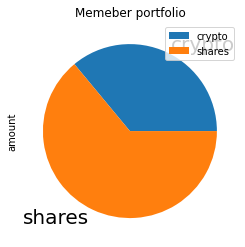

In [150]:
# Plot savings pie chart
df_savings.dtypes
df_savings["amount"] = df_savings["amount"].astype(float)
df_savings.dtypes
my_labels=["crypto","shares"]
df_savings.plot(kind = "pie", y="amount",title="Memeber portfolio",
                figsize=(4,4),fontsize=20,labels=my_labels)

plt.show()

In [151]:
# Set ideal emergency fund
monthly_income = 12000
emergency_fund = monthly_income * 3

# Calculate total amount of savings

crypto = 1.2 * my_btc + 5.3 * my_eth
shares = my_spy_value + my_agg_value
t_f = crypto + shares
# Validate saving health
def df_savings(x):
        if x <= t_f:
            return "Congrast!"
        elif x == t_f:
            return "kepp going with great work!"
        else:
            return "you are in debt!"
            
        
  

    
    

    
    

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [152]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-05-01', tz='America/New_York').isoformat()

In [153]:
# Get 3 years' worth of historical data for SPY and AGG

retirement_plan_3year = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

tickers = ["SPY","AGG"]
timeframe = "1D"

# Reorganize the DataFrame


df_retirement_plan_3year = retirement_plan_3year.get_bars(
        symbol=tickers,
        timeframe=timeframe,
        start=start_date,
        end=end_date,
               
).df
df_retirement_plan_3year["symbol"].unique()
# Separate ticker data
AGG = df_retirement_plan_3year[df_retirement_plan_3year["symbol"]=="AGG"].drop("symbol", axis = 1)
SPY =df_retirement_plan_3year[df_retirement_plan_3year["symbol"]=="SPY"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
df_AGG_SPY_3year = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

# Display sample data to Montecarlos level
df_AGG_SPY_3year

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2019-04-25 04:00:00+00:00  108.50  108.5500  108.4200  108.49  2648150   
2019-04-26 04:00:00+00:00  108.74  108.7500  108.6600  108.71  2300074   
2019-04-29 04:00:00+00:00  108.56  108.6200  108.4900  108.52  2782634   
2019-04-30 04:00:00+00:00  108.56  108.6800  108.5135  108.59  7491505   
2019-05-01 04:00:00+00:00  108.47  108.7600  108.3200  108.40  6387911   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.4100   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.2800   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.4200   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.4700   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.8800   
...                               ...         ...     ...     ...       ...   
2019-04-25 04:00:00+00:00        9121  108.473969  292.12  292.78  290.7300   
2019-04-26 04:00:00+00:00        8664  108.705413  292.12  293.49  291.2401   
2019-04-29 04:00:00+00:00        8977  108.539174  293.53  294.45  293.4100   
2019-04-30 04:00:00+00:00       17892  108.620462  293.52  294.34  291.9200   
2019-05-01 04:00:00+00:00       23490  108.455634  294.76  294.95  291.8000   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074  
...                           ...        ...         ...         ...  
2019-04-25 04:00:00+00:00  292.05   57875137      238260  292.051720  
2019-04-26 04:00:00+00:00  293.41   51449173      220594  292.642502  
2019-04-29 04:00:00+00:00  293.87   61675682      186857  293.871519  
2019-04-30 04:00:00+00:00  294.02   81411933      254912  293.551590  
2019-05-01 04:00:00+00:00  291.81   71921870      337374  293.457138  

[755 rows x 14 columns]

In [154]:
df_AGG_SPY_3year_close = pd.DataFrame()
df_AGG_SPY_3year_close["AGG"]=df_AGG_SPY_3year["AGG"]["close"]
df_AGG_SPY_3year_close["SPY"]=df_AGG_SPY_3year["SPY"]["close"]
df_AGG_SPY_3year_close

,AGG,SPY
timestamp,,
2016-05-02 04:00:00+00:00,110.61,208.03
2016-05-03 04:00:00+00:00,110.81,206.13
2016-05-04 04:00:00+00:00,110.86,204.96
2016-05-05 04:00:00+00:00,111.14,204.95
2016-05-06 04:00:00+00:00,110.97,205.70
...,...,...
2019-04-25 04:00:00+00:00,108.49,292.05
2019-04-26 04:00:00+00:00,108.71,293.41
2019-04-29 04:00:00+00:00,108.52,293.87


In [155]:
# Calculate and plot fortfolio slip 60/40 return on closing prices  between AGG and SPY

In [156]:
AGG_weights = 0.4
SPY_weights = 0.6

In [157]:
portfolio_closing_prices = df_AGG_SPY_3year_close["AGG"]* AGG_weights + df_AGG_SPY_3year_close["SPY"] * SPY_weights

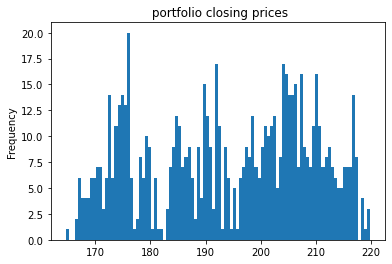

In [158]:
portfolio_closing_prices.plot.hist(bins=100,title =" portfolio closing prices")
plt.show()

In [159]:
'''
# This distribution doesn't look like a normal distribution with a mean of 100% and standard deviation of 10%.

'''

"\n# This distribution doesn't look like a normal distribution with a mean of 100% and standard deviation of 10%.\n\n"

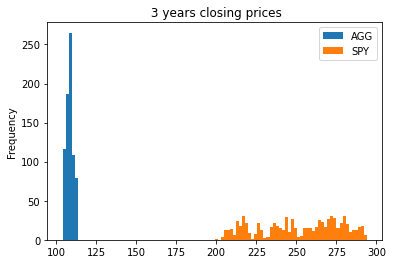

In [160]:
# plot the 3 years closing prices 
df_AGG_SPY_3year_close.plot.hist(bins=100,title=" 3 years closing prices")
plt.show()

In [161]:
'''
# the plots has no normal distribution whatsoever 

'''

'\n# the plots has no normal distribution whatsoever \n\n'

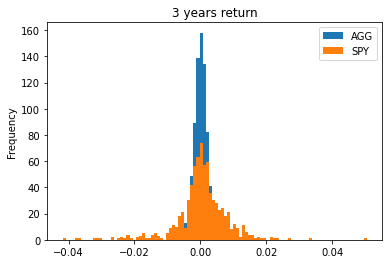

In [162]:
# plot 3 years returns 
df_ticker_3year_returns = df_AGG_SPY_3year_close.pct_change().dropna()
df_ticker_3year_returns.plot.hist(bins=100, title = "3 years return")
plt.show()

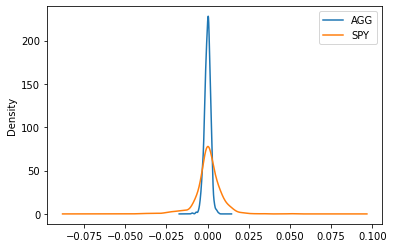

In [163]:
df_ticker_3year_returns.plot.density()
plt.show()

In [164]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(portfolio_data=df_AGG_SPY_3year, 
             weights=[0.4,0.6],
            num_simulation=500,
            num_trading_days=252*30)

In [165]:
# Printing the simulation input data
MC_30year.portfolio_data

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2019-04-25 04:00:00+00:00  108.50  108.5500  108.4200  108.49  2648150   
2019-04-26 04:00:00+00:00  108.74  108.7500  108.6600  108.71  2300074   
2019-04-29 04:00:00+00:00  108.56  108.6200  108.4900  108.52  2782634   
2019-04-30 04:00:00+00:00  108.56  108.6800  108.5135  108.59  7491505   
2019-05-01 04:00:00+00:00  108.47  108.7600  108.3200  108.40  6387911   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   
...                               ...         ...          ...     ...   
2019-04-25 04:00:00+00:00        9121  108.473969    -0.000092  292.12   
2019-04-26 04:00:00+00:00        8664  108.705413     0.002028  292.12   
2019-04-29 04:00:00+00:00        8977  108.539174    -0.001748  293.53   
2019-04-30 04:00:00+00:00       17892  108.620462     0.000645  293.52   
2019-05-01 04:00:00+00:00       23490  108.455634    -0.001750  294.76   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.4100  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.2800  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.4200  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.4700  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.8800  205.70   89131004      340335   
...                           ...       ...     ...        ...         ...   
2019-04-25 04:00:00+00:00  292.78  290.7300  292.05   57875137      238260   
2019-04-26 04:00:00+00:00  293.49  291.2401  293.41   51449173      220594   
2019-04-29 04:00:00+00:00  294.45  293.4100  293.87   61675682      186857   
2019-04-30 04:00:00+00:00  294.34  291.9200  294.02   81411933      254912   
2019-05-01 04:00:00+00:00  294.95  291.8000  291.81   71921870      337374   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659  
...                               ...          ...  
2019-04-25 04:00:00+00:00  292.051720    -0.000616  
2019-04-26 04:00:00+00:00  292.642502     0.004657  
2019-04-29 04:00:00+00:00  293.871519     0.001568  
2019-04-30 04:00:00+00:00  293.551590     0.000510  
2019-05-01 04:00:00+00:00  293.457138    -0.007516  

[755 rows x 16 columns]

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 110.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 120.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 130.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 140.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 150.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 160.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 170.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 180.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 190.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 200.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 210.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 220.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 230.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 240.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 250.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 260.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 270.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 280.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 290.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 300.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 310.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 320.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 330.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 340.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 350.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 360.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 370.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 380.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 390.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 400.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 410.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 420.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 430.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 440.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 450.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 460.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 470.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 480.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 490.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

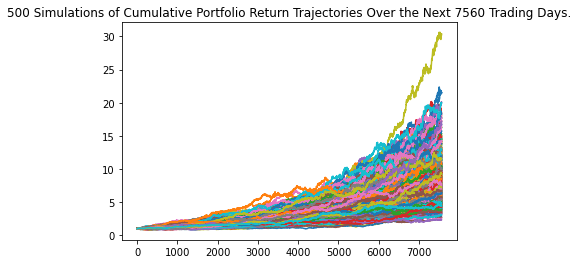

In [119]:
# Plot simulation outcomes
MC_30year.plot_simulation()
plt.show()

In [125]:
'''
 30 years simulations is too crowded because there a 500 of them
'''

'\n 30 years simulations is too crowded because there a 500 of them\n'

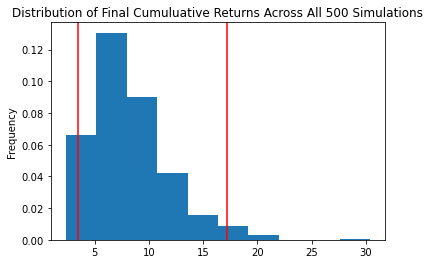

In [114]:
# Plot probability distribution and confidence intervals
MC_30year.plot_distribution()
plt.show()

In [124]:
'''
confidences interval right and left  with alpha level 5% two tail each one has 2.5%

''' 

'\nconfidences interval right and left  with alpha level 5% two tail each one has 2.5%\n\n'

### Retirement Analysis

In [120]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30year.summarize_cumulative_return()
# Print summary statistics

C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              8.232953
std               3.542725
min               2.354209
25%               5.698186
50%               7.489300
75%              10.090436
max              30.373833
95% CI Lower      3.490821
95% CI Upper     17.185102
Name: 7560, dtype: float64

In [ ]:
'''
in this 500 simulation we got mean of 8.4 diffrent than median 7.48, right upper bound 17.18 and left lower bound is 3.4

'''

### Ten Years Retirement Option

In [131]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(portfolio_data=df_AGG_SPY_3year, 
             weights=[0.8,0.2],
            num_simulation=500,
            num_trading_days=252*10)

In [132]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 110.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 120.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 130.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 140.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 150.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 160.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 170.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 180.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 190.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 200.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 210.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 220.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 230.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 240.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 250.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 260.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 270.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 280.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 290.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 300.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 310.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 320.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 330.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 340.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 350.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 360.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 370.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 380.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 390.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 400.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 410.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 420.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 430.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 440.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 450.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 460.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 470.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 480.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 490.


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarnin

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001032,0.998487,1.002310,0.999907,0.996710,1.001071,1.001115,0.999761,0.998337,1.001374,...,0.998942,1.001204,0.998837,0.997905,0.999807,0.996022,0.997766,1.000586,0.998105,0.995938
2,1.001132,0.999914,1.004158,0.994529,0.995872,0.999792,0.998652,1.001135,0.994678,1.002558,...,0.997277,1.002142,1.002851,0.994394,1.000856,0.996843,0.996958,1.000697,0.996899,0.998227
3,1.000596,1.003102,1.005136,0.998877,0.993714,1.003764,0.997058,0.999315,0.995393,1.005037,...,0.997779,1.003047,1.002138,0.990636,1.001345,0.994470,0.998128,0.998471,1.001721,0.999980
4,1.000931,1.002205,1.002173,1.000588,0.995218,1.006275,0.996509,0.999972,0.996180,1.007189,...,0.999978,1.002408,1.007740,0.992339,1.002250,0.994284,0.997949,1.000455,1.001106,1.004044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.287058,1.374797,0.970645,1.148323,1.007711,1.351378,1.177449,1.276199,1.132322,1.252354,...,1.110927,1.107589,1.344747,1.639450,1.211432,1.264630,1.489111,1.014035,1.040008,1.210698
2517,1.285744,1.377330,0.972664,1.149415,1.010320,1.349613,1.181068,1.275580,1.133864,1.255818,...,1.111012,1.106882,1.345483,1.640545,1.217084,1.263297,1.492887,1.015190,1.040115,1.210241
2518,1.283440,1.377739,0.972708,1.153527,1.012549,1.350947,1.181087,1.276244,1.135733,1.254535,...,1.112485,1.105856,1.341879,1.634908,1.214740,1.266137,1.490977,1.014310,1.040866,1.207447
2519,1.289963,1.373513,0.973070,1.154279,1.016332,1.358963,1.181602,1.277183,1.135015,1.257288,...,1.110877,1.105155,1.343676,1.636272,1.211326,1.267244,1.485668,1.012696,1.041840,1.207458


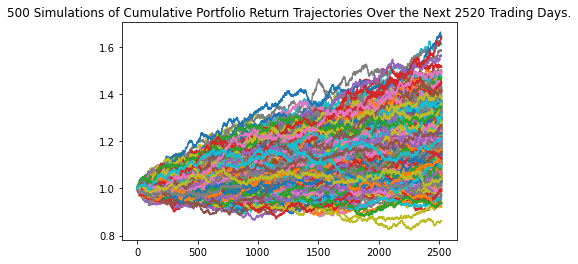

In [134]:
# Plot simulation outcomes
MC_10year.plot_simulation()
plt.show()

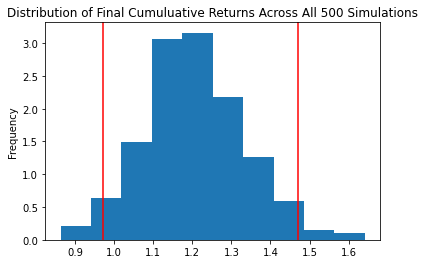

In [135]:
# Plot probability distribution and confidence intervals
MC_10year.plot_distribution()
plt.show()

In [136]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10year.summarize_cumulative_return()

# Print summary statistics


C:\Users\eszczepalink\Desktop\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              1.205262
std               0.127386
min               0.862883
25%               1.123108
50%               1.199301
75%               1.291031
max               1.641476
95% CI Lower      0.971700
95% CI Upper      1.470719
Name: 2520, dtype: float64

In [ ]:
'''
1).10 years simulation looks the mean and median are so close compare to 30 years one.
2).the confident interval are distributed evenly in lewer and upper bound
3). if the SPY is less volatile than AGG then with 80% weight increase  change getting good return therefore no need to wait
for 30 years to get the same or less return.

 


'''